In [83]:
import pandas as pd
import io
from google.colab import files
upload = files.upload()

#loading data from dataset
headers = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]

dataset = pd.read_csv(io.BytesIO(upload['auto-mpg-data.csv']) ,names= headers )
dataset.head()


Saving auto-mpg-data.csv to auto-mpg-data (2).csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11,70,1,plymouth satellite
4,16,8,304,150,3433,12,70,1,amc rebel sst


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           399 non-null    object
 1   cylinders     399 non-null    object
 2   displacement  399 non-null    object
 3   horsepower    399 non-null    object
 4   weight        399 non-null    object
 5   acceleration  399 non-null    object
 6   model_year    399 non-null    object
 7   origin        399 non-null    object
 8   car_name      399 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [63]:
#droping rows with missing values
print(dataset.isna().sum())
dataset = dataset.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


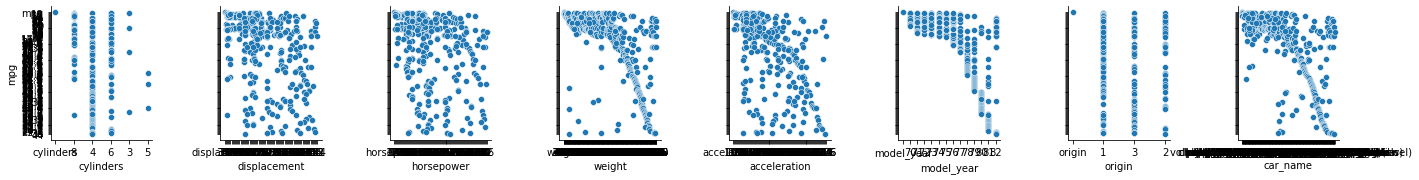

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
#ploting all attributes with respect to mpg
sns.pairplot(dataset , x_vars=['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'], y_vars = ['mpg'])
plt.show()

In [86]:

X = dataset['displacement']
y = dataset['mpg']

#training and testing features
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train

340     84
64     175
55      69
106    170
300     71
      ... 
323     65
192    100
117    230
47      72
172     96
Name: horsepower, Length: 319, dtype: object

In [87]:
y_train

340    26.6
64       14
55       35
106      13
300    27.2
       ... 
323    46.6
192      22
117      16
47       22
172      24
Name: mpg, Length: 319, dtype: object

In [88]:
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(279, 1)
(120, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.intercept + lm.coefficient_*X_train, 'r') #coef of mpg and displacement
plt.show()